In [1]:
import pandas as pd
import numpy as np

from tqdm.notebook import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

In [212]:
gene_name_and_protein_acc_df = pd.read_csv("gene_name_and_protein_acc.csv")

In [213]:
gene_name_and_protein_acc_df

,acc,gene
0,P04217,A1BG
1,Q9NQ94,A1CF
2,P01023,A2M
3,A8K2U0,A2ML1
4,U3KPV4,A3GALT2
...,...,...
4995,Q2VIR3,EIF2S3B
4996,Q14152,EIF3A
4997,P55884,EIF3B
4998,Q99613,EIF3C


In [214]:
sampled_gene_and_protein = gene_name_and_protein_acc_df.sample(n=300, random_state=49).reset_index(drop=True)

In [215]:
gene_list = []
protein_list = []
for idx, row in sampled_gene_and_protein.iterrows():
    gene_list.append(("Gene", "UniprotKB", row["gene"], np.nan))
    protein_list.append(("Protein", "UniprotKB", row["acc"], np.nan))

In [216]:
gene_list_df = pd.DataFrame(gene_list, columns=["Type", "Source Database", "ID", "Name"])

In [217]:
protein_list_df = pd.DataFrame(protein_list, columns=["Type", "Source Database", "ID", "Name"])

In [218]:
efo_diseases_df = pd.read_csv("efo_disease_terms.csv")

In [219]:
sampled_efo = efo_diseases_df.sample(n=100, random_state=49).reset_index(drop=True)

In [220]:
efo_diseases_list = []
for idx, row in sampled_efo.iterrows():
    efo_diseases_list.append(("Disease", "EFO", row["obo_id"], row["label"]))    

In [221]:
efo_diseases_list_df = pd.DataFrame(efo_diseases_list, columns=["Type", "Source Database", "ID", "Name"])

In [222]:
kegg_pathway_and_disease_df = pd.read_csv("kegg_pathway_and_disease.csv")

In [223]:
kegg_pathway_and_disease_df = kegg_pathway_and_disease_df.drop_duplicates(subset=["kegg_pathwayname", "kegg_diseasename"])

In [224]:
sampled_kegg_pathway_and_disease = kegg_pathway_and_disease_df.sample(n=100, random_state=49).reset_index(drop=True)

In [225]:
kegg_pathway_list = []
kegg_disease_list = []

for idx, row in sampled_kegg_pathway_and_disease.iterrows():
    kegg_pathway_list.append(("Pathway", "KEGG", row["kegg_pathwayid"], row["kegg_pathwayname"]))
    kegg_disease_list.append(("Disease", "KEGG", row["kegg_diseaseid"], row["kegg_diseasename"]))

In [226]:
kegg_pathway_list_df = pd.DataFrame(kegg_pathway_list, columns=["Type", "Source Database", "ID", "Name"])

In [227]:
kegg_disease_list_df = pd.DataFrame(kegg_disease_list, columns=["Type", "Source Database", "ID", "Name"])

In [228]:
reactome_pathway_df = pd.read_csv("reactome_pathway.csv")

In [229]:
sampled_reactome_pathway = reactome_pathway_df.sample(n=100, random_state=49).reset_index(drop=True)

In [230]:
reactome_pathway_list = []
for idx, row in sampled_reactome_pathway.iterrows():
    reactome_pathway_list.append(("Pathway", "Reactome", row["id"], row["pathwayName"]))

In [231]:
reactome_pathway_list_df = pd.DataFrame(reactome_pathway_list, columns=["Type", "Source Database", "ID", "Name"])

In [232]:
disease_list_df = pd.concat([efo_diseases_list_df, kegg_disease_list_df]).reset_index(drop=True)

In [233]:
pathway_list_df = pd.concat([reactome_pathway_list_df, kegg_pathway_list_df]).reset_index(drop=True)

In [234]:
drug_df = pd.read_csv("drug_terms.csv")

In [235]:
sampled_drug_df = drug_df.sample(n=100, random_state=49).reset_index(drop=True)

In [236]:
drug_list = []
for idx, row in sampled_drug_df.iterrows():
    drug_list.append(("Drug", "DrugBank", row["identifier"], row["name"]))

In [237]:
drug_list_df = pd.DataFrame(drug_list, columns=["Type", "Source Database", "ID", "Name"])

In [238]:
compound_df = pd.read_csv("compound_terms.csv")

In [239]:
sampled_compound_df = compound_df.sample(n=100, random_state=49).reset_index(drop=True)

In [240]:
compound_list = []
for idx, row in sampled_compound_df.iterrows():
    compound_list.append(("Compound", "ChEMBL", row["molecule_chembl_id"], np.nan))

In [241]:
compound_list_df = pd.DataFrame(compound_list, columns=["Type", "Source Database", "ID", "Name"])

In [242]:
phenotype_df = pd.read_csv("phenotype_terms.csv")

In [243]:
sampled_phenotype_df = phenotype_df.sample(n=100, random_state=49).reset_index(drop=True)

In [244]:
phenotype_list = []
for idx, row in sampled_phenotype_df.iterrows():
    phenotype_list.append(("Phenotype", "HPO", row["hpo_id"], row["term_name"]))

In [245]:
phenotype_list_df = pd.DataFrame(phenotype_list, columns=["Type", "Source Database", "ID", "Name"])

In [246]:
go_function_df = pd.read_csv("go_function_terms.csv")

In [247]:
go_function_df = go_function_df.drop_duplicates(subset=["UniProt", "GO Term go_id"])
go_function_df.dropna(axis=0, inplace=True)

In [248]:
sampled_go_function_df = go_function_df.sample(n=100, random_state=49).reset_index(drop=True)

In [249]:
function_list = []
for idx, row in sampled_go_function_df.iterrows():
    function_list.append(("Function", "GO", row["GO Term go_id"], row["GO Term"]))

In [250]:
function_list_df = pd.DataFrame(function_list, columns=["Type", "Source Database", "ID", "Name"])

In [251]:
tissue_terms_df = pd.read_csv("tissue_terms.csv").reset_index()

In [252]:
tissue_terms_df.drop(labels=["level_0"], axis=1, inplace=True)

In [253]:
tissue_terms_df.columns = ['Name', 'Cell Model Passports', 'COSMIC ID', 'TCGA Classification', 'Tissue', 'Tissue sub-type', 'COUNT1', 'COUNT2', 'COUNT3']

In [357]:
tissue_terms_df = tissue_terms_df.drop_duplicates(subset='Cell Model Passports')

In [358]:
sampled_tissue_terms_df = tissue_terms_df.sample(n=200, random_state=49).reset_index(drop=True)

In [359]:
tissue_list = []
for idx, row in sampled_tissue_terms_df.iterrows():
    tissue_list.append(("Cell/Tissue", "GDSC", row["Cell Model Passports"], row["Tissue"]))

In [360]:
tissue_list_df = pd.DataFrame(tissue_list, columns=["Type", "Source Database", "ID", "Name"])

In [258]:
frames = []
for n in range(5):
    patient_df = pd.read_csv(fr"patient_terms\repository-cases-table.2022-07-09 ({n}).tsv", sep="\t")
    frames.append(patient_df)

In [259]:
patient_df = pd.concat(frames)

In [367]:
sampled_patient_df = patient_df.sample(n=200, random_state=49).reset_index(drop=True)

In [368]:
patient_list = []
for idx, row in sampled_patient_df.iterrows():
    patient_list.append(("Patient", "TCGA", row["Case ID"], row["Primary Site"]))

In [369]:
patient_list_df = pd.DataFrame(patient_list, columns=["Type", "Source Database", "ID", "Name"])

In [263]:
domain_df = pd.read_csv("domain_terms.tsv", sep="\t")
domain_df.drop(labels=["Integrated Signatures", "GO Terms"], axis=1, inplace=True)
domain_df.dropna(axis=0, inplace=True)
domain_df = domain_df[domain_df["Type"] == "domain"]

In [264]:
sampled_domain_df = domain_df.sample(n=100, random_state=49).reset_index(drop=True)

In [265]:
domain_list = []
for idx, row in sampled_domain_df.iterrows():
    domain_list.append(("Domain", "InterPro", row["Integrated Into"], row["Name"]))

In [266]:
domain_list_df = pd.DataFrame(domain_list, columns=["Type", "Source Database", "ID", "Name"])

In [267]:
side_effect_df = pd.read_excel("Drug_ADR.xlsx")

In [268]:
sampled_side_effect_df = side_effect_df.sample(n=100, random_state=49).reset_index(drop=True)

In [269]:
side_effect_list = []
for idx, row in sampled_side_effect_df.iterrows():
    side_effect_list.append(("Side Effect", "ADReCS", row["ADR_ID"], row["ADR_TERM"]))

In [270]:
side_effect_list_df = pd.DataFrame(side_effect_list, columns=["Type", "Source Database", "ID", "Name"])

In [271]:
location_df = pd.read_csv("location_terms.tsv", sep="\t")

In [272]:
sampled_location_df = location_df.sample(n=100, random_state=49).reset_index(drop=True)

In [273]:
location_list = []
for idx, row in sampled_location_df.iterrows():
    location_list.append(("Location", "GOA", row["ECO ID"], row["GO NAME"]))

In [274]:
location_list_df = pd.DataFrame(location_list, columns=["Type", "Source Database", "ID", "Name"])

In [277]:
organism_list = [("Organism", "UniprotKB", "9606", "Homo sapiens")]

In [278]:
organism_list_df = pd.DataFrame(organism_list, columns=["Type", "Source Database", "ID", "Name"])

In [ ]:
# SUM THEM ALL!

In [370]:
all_nodes_list = [gene_list_df, protein_list_df, disease_list_df, pathway_list_df, drug_list_df, compound_list_df, phenotype_list_df,
                 function_list_df, tissue_list_df, patient_list_df, domain_list_df, side_effect_list_df, location_list_df, organism_list_df]

In [371]:
all_nodes_list_df = pd.concat(all_nodes_list).reset_index(drop=True)

In [475]:
all_nodes_list_df.drop_duplicates(inplace=True)

In [476]:
all_nodes_list_df

,Type,Source Database,ID,Name
0,Gene,UniprotKB,CDC37L1,NaN
1,Gene,UniprotKB,CDA,NaN
2,Gene,UniprotKB,CHCHD10,NaN
3,Gene,UniprotKB,ALG1L2,NaN
4,Gene,UniprotKB,ACTR3C,NaN
...,...,...,...,...
2002,Location,GOA,ECO:0000323,membrane
2043,Location,GOA,ECO:0000323,cell outer membrane
2047,Location,GOA,ECO:0000323,extracellular region
2079,Location,GOA,ECO:0000323,periplasmic space


In [477]:
all_nodes_list_df.to_csv(r"nodes/nodes.csv", index=False)

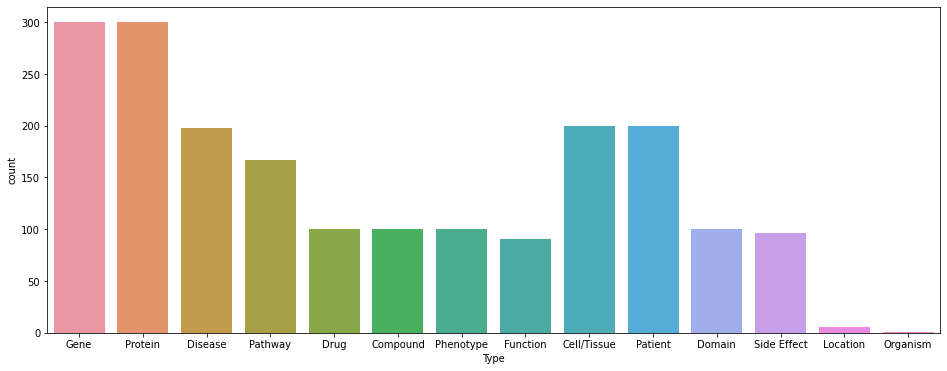

In [510]:
plt.figure(figsize=(16, 6))
sns.countplot(data=all_nodes_list_df, x="Type")
plt.show()

In [395]:
def create_relationship(df, source, target, label, interaction_number, randomly_choose=True):
    source_df = df[df["Type"] == source].reset_index(drop=True)
    target_df = df[df["Type"] == target].reset_index(drop=True)

    for count in range(interaction_number):
        if randomly_choose:            
            while True:            
                source_choice = np.random.choice(source_df.index.values, size=1)[0]
                target_choice = np.random.choice(target_df.index.values, size=1)[0]
                if source_choice != target_choice:
                    break
        else:
            if target == "Organism":
                source_choice = count
                target_choice = 0
            else:                
                source_choice = count
                target_choice = count
        
        source_id = source_df.iloc[source_choice, :]["ID"]
        target_id = target_df.iloc[target_choice, :]["ID"]

        
        yield (source, source_id, target, target_id, label)

In [389]:
Interactions_map = [("Protein", "Protein", "Interacts_With", 150, True),
                   ("Protein", "Domain", "Has", 85, True),
                   ("Protein", "Function", "Enables", 85, True),
                   ("Protein", "Location", "Localizes_To", 85, True),
                   ("Protein", "Pathway", "Take_Part_In", 175, True),
                   ("Gene", "Protein", "Encodes", 300, False),
                   ("Gene", "Gene", "Is_Ortholog_To", 100, True),
                   ("Gene", "Gene", "Regulates", 100, True),
                   ("Gene", "Organism", "Belongs_To", 300, False),
                   ("Gene", "Cell/Tissue", "Is_Mutated_In", 85, True),
                   ("Gene", "Cell/Tissue", "Is_DEG_In", 85, True),
                   ("Gene", "Phenotype", "Is_Associated_With", 85, True),
                   ("Gene", "Patient", "Is_Mutated_In", 85, True),
                   ("Gene", "Patient", "Is_DEG_In", 85, True),
                   ("Gene", "Pathway", "Is_Member_Of", 175, True),
                   ("Gene", "Disease", "Is_related_to", 175, True),
                   ("Disease", "Protein", "Is_related_to", 175, True),
                   ("Drug", "Drug", "Interacts_With", 75, True),
                   ("Drug", "Protein", "Targets", 85, True),
                   ("Drug", "Side Effect", "Has", 75, True),
                   ("Drug", "Cell/Tissue", "Targets", 85, True),
                   ("Drug", "Pathway", "Has_Target_In", 85, True),
                   ("Compound", "Protein", "Targets", 85, True),
                   ("Cell/Tissue", "Disease", "Has", 85, True),
                   ("Patient", "Disease", "Has", 100, True),
                   ("Disease", "Disease", "Comorbid_With", 100, True),
                   ("Disease", "Phenotype", "Is_Associated_With", 75, True),
                   ("Disease", "Pathway", "Modulates", 85, True),
                   ("Disease", "Drug", "Is_Treated_By", 50, True),
                   ("Domain", "Function", "Has", 50, True),
                   ("Domain", "Location", "Has", 50, True)]

In [396]:
all_interactions = []
for relation in Interactions_map:
    print(relation)    
    interactions = list(create_relationship(df=all_nodes_list_df, source=relation[0], target=relation[1], label=relation[2], interaction_number=relation[3], randomly_choose=relation[4]))
    all_interactions.extend(interactions) 

('Protein', 'Protein', 'Interacts_With', 150, True)
('Protein', 'Domain', 'Has', 85, True)
('Protein', 'Function', 'Enables', 85, True)
('Protein', 'Location', 'Localizes_To', 85, True)
('Protein', 'Pathway', 'Take_Part_In', 175, True)
('Gene', 'Protein', 'Encodes', 300, False)
('Gene', 'Gene', 'Is_Ortholog_To', 100, True)
('Gene', 'Gene', 'Regulates', 100, True)
('Gene', 'Organism', 'Belongs_To', 300, False)
('Gene', 'Cell/Tissue', 'Is_Mutated_In', 85, True)
('Gene', 'Cell/Tissue', 'Is_DEG_In', 85, True)
('Gene', 'Phenotype', 'Is_Associated_With', 85, True)
('Gene', 'Patient', 'Is_Mutated_In', 85, True)
('Gene', 'Patient', 'Is_DEG_In', 85, True)
('Gene', 'Pathway', 'Is_Member_Of', 175, True)
('Gene', 'Disease', 'Is_related_to', 175, True)
('Disease', 'Protein', 'Is_related_to', 175, True)
('Drug', 'Drug', 'Interacts_With', 75, True)
('Drug', 'Protein', 'Targets', 85, True)
('Drug', 'Side Effect', 'Has', 75, True)
('Drug', 'Cell/Tissue', 'Targets', 85, True)
('Drug', 'Pathway', 'Has_Ta

In [397]:
all_interactions

[('Protein', 'P04745', 'Protein', 'Q5VUE5', 'Interacts_With'),
 ('Protein', 'P35523', 'Protein', 'Q13112', 'Interacts_With'),
 ('Protein', 'P47902', 'Protein', 'Q9NZ63', 'Interacts_With'),
 ('Protein', 'Q96M20', 'Protein', 'P16619', 'Interacts_With'),
 ('Protein', 'P48061', 'Protein', 'Q9UKV5', 'Interacts_With'),
 ('Protein', 'Q9HBK9', 'Protein', 'Q6UUV7', 'Interacts_With'),
 ('Protein', 'Q6Y288', 'Protein', 'Q9UHD4', 'Interacts_With'),
 ('Protein', 'A4FU69', 'Protein', 'Q13112', 'Interacts_With'),
 ('Protein', 'P25311', 'Protein', 'P08319', 'Interacts_With'),
 ('Protein', 'Q9H1M4', 'Protein', 'Q9NZK5', 'Interacts_With'),
 ('Protein', 'Q9Y294', 'Protein', 'Q8N687', 'Interacts_With'),
 ('Protein', 'Q96LL3', 'Protein', 'Q96AZ1', 'Interacts_With'),
 ('Protein', 'O95561', 'Protein', 'Q8WUY9', 'Interacts_With'),
 ('Protein', 'Q6RI45', 'Protein', 'Q504U0', 'Interacts_With'),
 ('Protein', 'Q13616', 'Protein', 'Q7RTS9', 'Interacts_With'),
 ('Protein', 'P35523', 'Protein', 'Q86TX2', 'Interacts_

In [398]:
len(all_interactions)

3415

In [399]:
all_interactions_df = pd.DataFrame(all_interactions, columns=["Source Type", "Source ID", "Target Type", "Target ID", "Label"])

In [479]:
all_interactions_df.drop_duplicates(inplace=True)

In [480]:
all_interactions_df

,Source Type,Source ID,Target Type,Target ID,Label
0,Protein,P04745,Protein,Q5VUE5,Interacts_With
1,Protein,P35523,Protein,Q13112,Interacts_With
2,Protein,P47902,Protein,Q9NZ63,Interacts_With
3,Protein,Q96M20,Protein,P16619,Interacts_With
4,Protein,P48061,Protein,Q9UKV5,Interacts_With
...,...,...,...,...,...
3409,Domain,IPR008758,Location,ECO:0000323,Has
3410,Domain,IPR021645,Location,ECO:0000323,Has
3411,Domain,IPR011625,Location,ECO:0000323,Has
3412,Domain,IPR002773,Location,ECO:0000323,Has


In [481]:
all_interactions_df.to_csv(r"edges/edges.csv", index=False)

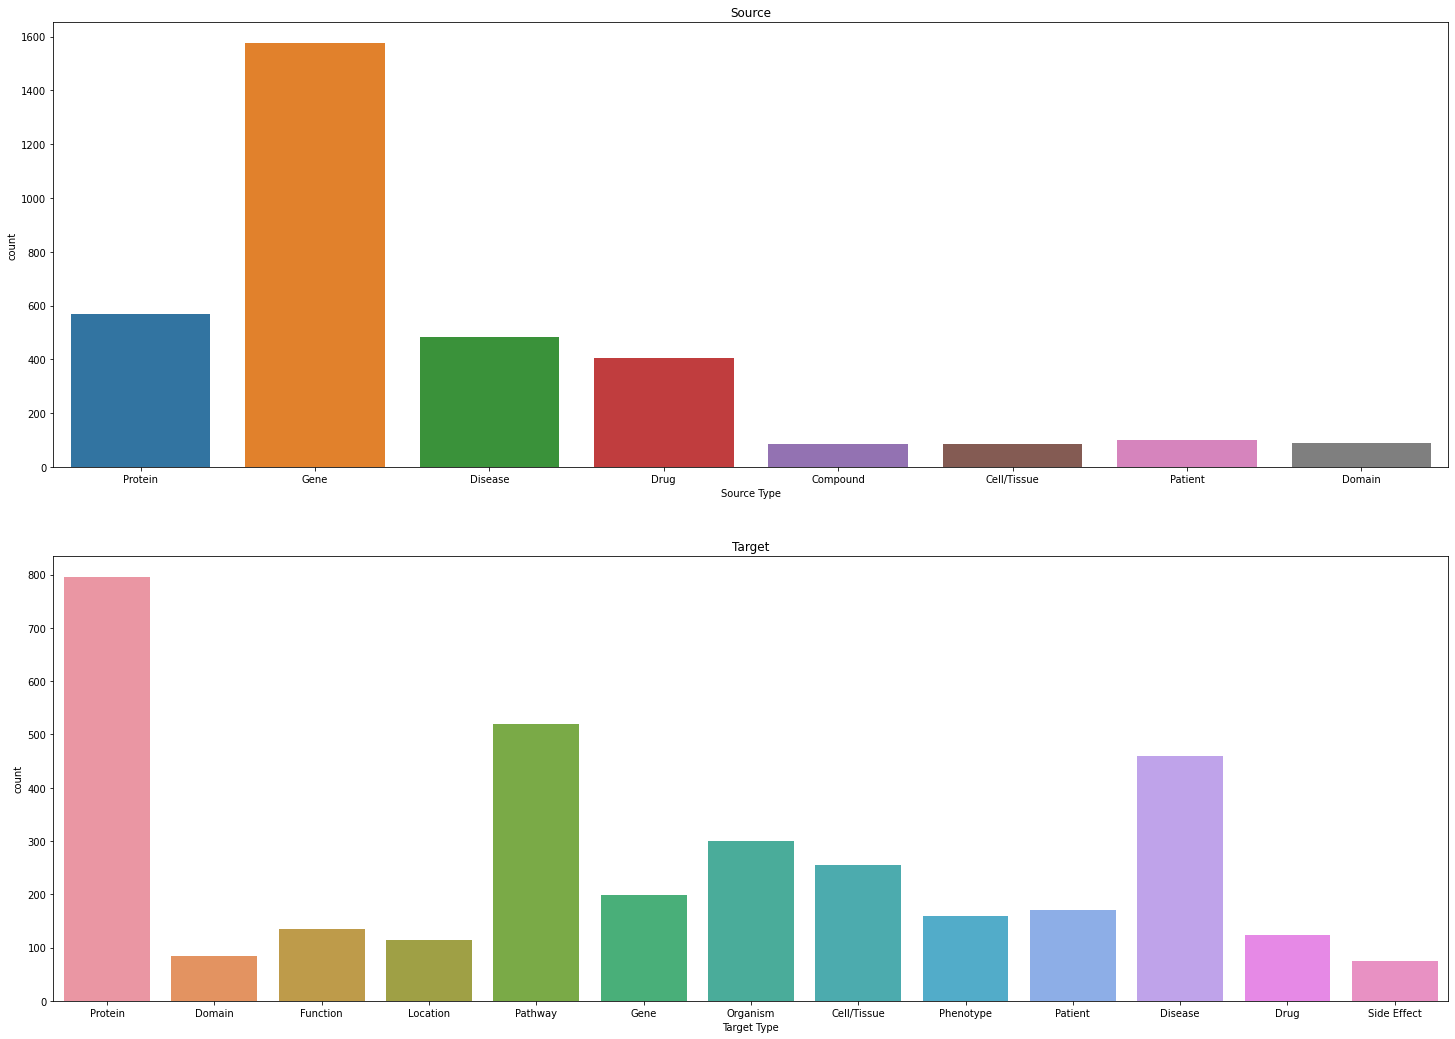

In [523]:
fig, ax =plt.subplots(2, 1, figsize=(25, 18))
sns.countplot(data=all_interactions_df, x="Source Type", ax=ax[0])
ax[0].title.set_text('Source')
sns.countplot(data=all_interactions_df, x="Target Type", ax=ax[1])
ax[1].title.set_text('Target')
plt.show()

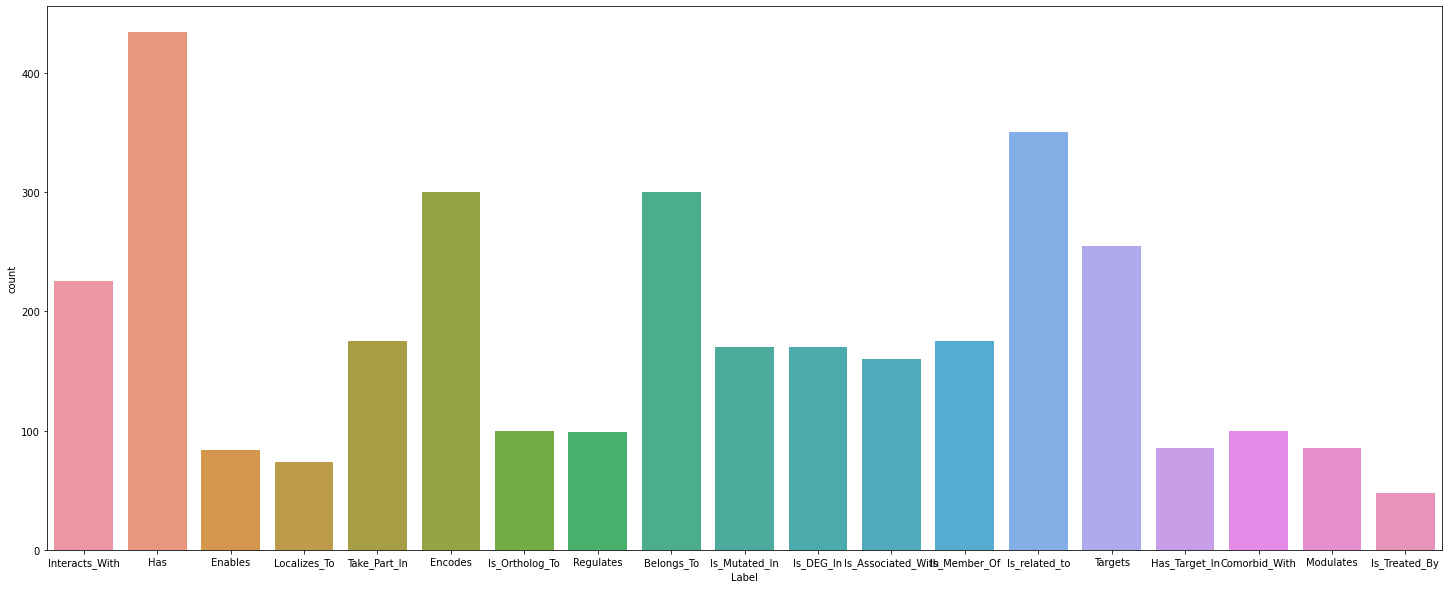

In [522]:
plt.figure(figsize=(25, 10))
sns.countplot(data=all_interactions_df, x="Label")
plt.show()

In [484]:
from neo4j import GraphDatabase

In [485]:
graphdb = GraphDatabase.driver(uri='bolt://localhost:7687', auth=('neo4j', '1234'))
session = graphdb.session(database='neo4j')

In [487]:
match = 'MATCH (n) RETURN n'
res = session.run(match)
for i in res:
    print(i)

In [501]:
delete = 'MATCH (n) DETACH DELETE n'
session.run(delete)

In [2]:
nodes = pd.read_csv(r"nodes/nodes.csv")

In [3]:
nodes

,Type,Source Database,ID,Name
0,Gene,UniprotKB,CDC37L1,NaN
1,Gene,UniprotKB,CDA,NaN
2,Gene,UniprotKB,CHCHD10,NaN
3,Gene,UniprotKB,ALG1L2,NaN
4,Gene,UniprotKB,ACTR3C,NaN
...,...,...,...,...
1954,Location,GOA,ECO:0000323,membrane
1955,Location,GOA,ECO:0000323,cell outer membrane
1956,Location,GOA,ECO:0000323,extracellular region
1957,Location,GOA,ECO:0000323,periplasmic space


In [455]:
def process_type(type_):
    if type_ == "Cell/Tissue":
        type_ = type_.replace("/","_")
    elif type_ == "Side Effect":
        type_ = type_.replace(" ","_")
    
    return str(type_)

In [502]:
for idx, row in tqdm(nodes.iterrows()):
    type_ = process_type(row["Type"])
    source_db = str(row["Source Database"])
    id_ = str(row["ID"])
    name = str(row["Name"])
    
    
    if isinstance(row["Name"], str):
        query = f"MERGE (:{type_}:{source_db}{{id:\"{id_}\", name: \"{name}\"}})"
        session.run(query)
    else:
        query = f"MERGE (:{type_}:{source_db}{{id:\"{id_}\"}})"
        session.run(query)    

0it [00:00, ?it/s]

In [4]:
edges = pd.read_csv(r"edges/edges.csv")

In [5]:
edges

,Source Type,Source ID,Target Type,Target ID,Label
0,Protein,P04745,Protein,Q5VUE5,Interacts_With
1,Protein,P35523,Protein,Q13112,Interacts_With
2,Protein,P47902,Protein,Q9NZ63,Interacts_With
3,Protein,Q96M20,Protein,P16619,Interacts_With
4,Protein,P48061,Protein,Q9UKV5,Interacts_With
...,...,...,...,...,...
3384,Domain,IPR008758,Location,ECO:0000323,Has
3385,Domain,IPR021645,Location,ECO:0000323,Has
3386,Domain,IPR011625,Location,ECO:0000323,Has
3387,Domain,IPR002773,Location,ECO:0000323,Has


In [503]:
for idx, row in tqdm(edges.iterrows()):
    source_type = process_type(row["Source Type"])
    target_type = process_type(row["Target Type"])
    source_id = str(row["Source ID"])
    target_id = str(row["Target ID"])
    label = str(row["Label"])
    
    query = f"MATCH (s:{source_type}{{id:'{source_id}'}}), (t:{target_type}{{id:'{target_id}'}}) MERGE (s)-[:{label}]->(t)"
    session.run(query)

0it [00:00, ?it/s]

In [508]:
match = 'MATCH (n)-[r]->(p) RETURN labels(n), labels(p), type(r)'
res = session.run(match)
for i in res:
    print(i)

<Record labels(n)=['Gene', 'UniprotKB'] labels(p)=['Disease', 'KEGG'] type(r)='Is_related_to'>
<Record labels(n)=['Gene', 'UniprotKB'] labels(p)=['UniprotKB', 'Organism'] type(r)='Belongs_To'>
<Record labels(n)=['Gene', 'UniprotKB'] labels(p)=['Protein', 'UniprotKB'] type(r)='Encodes'>
<Record labels(n)=['Gene', 'UniprotKB'] labels(p)=['Disease', 'KEGG'] type(r)='Is_related_to'>
<Record labels(n)=['Gene', 'UniprotKB'] labels(p)=['UniprotKB', 'Organism'] type(r)='Belongs_To'>
<Record labels(n)=['Gene', 'UniprotKB'] labels(p)=['Gene', 'UniprotKB'] type(r)='Regulates'>
<Record labels(n)=['Gene', 'UniprotKB'] labels(p)=['Gene', 'UniprotKB'] type(r)='Is_Ortholog_To'>
<Record labels(n)=['Gene', 'UniprotKB'] labels(p)=['Protein', 'UniprotKB'] type(r)='Encodes'>
<Record labels(n)=['Gene', 'UniprotKB'] labels(p)=['Disease', 'KEGG'] type(r)='Is_related_to'>
<Record labels(n)=['Gene', 'UniprotKB'] labels(p)=['Disease', 'KEGG'] type(r)='Is_related_to'>
<Record labels(n)=['Gene', 'UniprotKB'] label

<Record labels(n)=['Gene', 'UniprotKB'] labels(p)=['UniprotKB', 'Organism'] type(r)='Belongs_To'>
<Record labels(n)=['Gene', 'UniprotKB'] labels(p)=['Gene', 'UniprotKB'] type(r)='Is_Ortholog_To'>
<Record labels(n)=['Gene', 'UniprotKB'] labels(p)=['Protein', 'UniprotKB'] type(r)='Encodes'>
<Record labels(n)=['Gene', 'UniprotKB'] labels(p)=['Disease', 'EFO'] type(r)='Is_related_to'>
<Record labels(n)=['Gene', 'UniprotKB'] labels(p)=['Pathway', 'Reactome'] type(r)='Is_Member_Of'>
<Record labels(n)=['Gene', 'UniprotKB'] labels(p)=['Pathway', 'Reactome'] type(r)='Is_Member_Of'>
<Record labels(n)=['Gene', 'UniprotKB'] labels(p)=['Patient', 'TCGA'] type(r)='Is_DEG_In'>
<Record labels(n)=['Gene', 'UniprotKB'] labels(p)=['HPO', 'Phenotype'] type(r)='Is_Associated_With'>
<Record labels(n)=['Gene', 'UniprotKB'] labels(p)=['Cell_Tissue', 'GDSC'] type(r)='Is_Mutated_In'>
<Record labels(n)=['Gene', 'UniprotKB'] labels(p)=['UniprotKB', 'Organism'] type(r)='Belongs_To'>
<Record labels(n)=['Gene', 'Uni

<Record labels(n)=['Gene', 'UniprotKB'] labels(p)=['Gene', 'UniprotKB'] type(r)='Regulates'>
<Record labels(n)=['Gene', 'UniprotKB'] labels(p)=['Protein', 'UniprotKB'] type(r)='Encodes'>
<Record labels(n)=['Gene', 'UniprotKB'] labels(p)=['UniprotKB', 'Organism'] type(r)='Belongs_To'>
<Record labels(n)=['Gene', 'UniprotKB'] labels(p)=['Gene', 'UniprotKB'] type(r)='Regulates'>
<Record labels(n)=['Gene', 'UniprotKB'] labels(p)=['Gene', 'UniprotKB'] type(r)='Is_Ortholog_To'>
<Record labels(n)=['Gene', 'UniprotKB'] labels(p)=['Protein', 'UniprotKB'] type(r)='Encodes'>
<Record labels(n)=['Gene', 'UniprotKB'] labels(p)=['Disease', 'KEGG'] type(r)='Is_related_to'>
<Record labels(n)=['Gene', 'UniprotKB'] labels(p)=['Pathway', 'KEGG'] type(r)='Is_Member_Of'>
<Record labels(n)=['Gene', 'UniprotKB'] labels(p)=['Cell_Tissue', 'GDSC'] type(r)='Is_DEG_In'>
<Record labels(n)=['Gene', 'UniprotKB'] labels(p)=['Cell_Tissue', 'GDSC'] type(r)='Is_Mutated_In'>
<Record labels(n)=['Gene', 'UniprotKB'] labels(

<Record labels(n)=['Protein', 'UniprotKB'] labels(p)=['Domain', 'InterPro'] type(r)='Has'>
<Record labels(n)=['Protein', 'UniprotKB'] labels(p)=['Protein', 'UniprotKB'] type(r)='Interacts_With'>
<Record labels(n)=['Protein', 'UniprotKB'] labels(p)=['Function', 'GO'] type(r)='Enables'>
<Record labels(n)=['Protein', 'UniprotKB'] labels(p)=['Protein', 'UniprotKB'] type(r)='Interacts_With'>
<Record labels(n)=['Protein', 'UniprotKB'] labels(p)=['Domain', 'InterPro'] type(r)='Has'>
<Record labels(n)=['Protein', 'UniprotKB'] labels(p)=['Pathway', 'KEGG'] type(r)='Take_Part_In'>
<Record labels(n)=['Protein', 'UniprotKB'] labels(p)=['Protein', 'UniprotKB'] type(r)='Interacts_With'>
<Record labels(n)=['Protein', 'UniprotKB'] labels(p)=['Pathway', 'Reactome'] type(r)='Take_Part_In'>
<Record labels(n)=['Protein', 'UniprotKB'] labels(p)=['Pathway', 'Reactome'] type(r)='Take_Part_In'>
<Record labels(n)=['Protein', 'UniprotKB'] labels(p)=['Location', 'GOA'] type(r)='Localizes_To'>
<Record labels(n)=[

<Record labels(n)=['Disease', 'KEGG'] labels(p)=['Protein', 'UniprotKB'] type(r)='Is_related_to'>
<Record labels(n)=['Disease', 'KEGG'] labels(p)=['Drug', 'DrugBank'] type(r)='Is_Treated_By'>
<Record labels(n)=['Disease', 'KEGG'] labels(p)=['Disease', 'KEGG'] type(r)='Comorbid_With'>
<Record labels(n)=['Disease', 'KEGG'] labels(p)=['HPO', 'Phenotype'] type(r)='Is_Associated_With'>
<Record labels(n)=['Disease', 'KEGG'] labels(p)=['Disease', 'KEGG'] type(r)='Comorbid_With'>
<Record labels(n)=['Disease', 'KEGG'] labels(p)=['Disease', 'KEGG'] type(r)='Comorbid_With'>
<Record labels(n)=['Disease', 'KEGG'] labels(p)=['Protein', 'UniprotKB'] type(r)='Is_related_to'>
<Record labels(n)=['Disease', 'KEGG'] labels(p)=['Drug', 'DrugBank'] type(r)='Is_Treated_By'>
<Record labels(n)=['Disease', 'KEGG'] labels(p)=['Protein', 'UniprotKB'] type(r)='Is_related_to'>
<Record labels(n)=['Disease', 'KEGG'] labels(p)=['Protein', 'UniprotKB'] type(r)='Is_related_to'>
<Record labels(n)=['Disease', 'KEGG'] labe

<Record labels(n)=['Cell_Tissue', 'GDSC'] labels(p)=['Disease', 'EFO'] type(r)='Has'>
<Record labels(n)=['Cell_Tissue', 'GDSC'] labels(p)=['Disease', 'KEGG'] type(r)='Has'>
<Record labels(n)=['Cell_Tissue', 'GDSC'] labels(p)=['Disease', 'EFO'] type(r)='Has'>
<Record labels(n)=['Cell_Tissue', 'GDSC'] labels(p)=['Disease', 'EFO'] type(r)='Has'>
<Record labels(n)=['Cell_Tissue', 'GDSC'] labels(p)=['Disease', 'EFO'] type(r)='Has'>
<Record labels(n)=['Cell_Tissue', 'GDSC'] labels(p)=['Disease', 'KEGG'] type(r)='Has'>
<Record labels(n)=['Cell_Tissue', 'GDSC'] labels(p)=['Disease', 'EFO'] type(r)='Has'>
<Record labels(n)=['Cell_Tissue', 'GDSC'] labels(p)=['Disease', 'EFO'] type(r)='Has'>
<Record labels(n)=['Cell_Tissue', 'GDSC'] labels(p)=['Disease', 'EFO'] type(r)='Has'>
<Record labels(n)=['Cell_Tissue', 'GDSC'] labels(p)=['Disease', 'KEGG'] type(r)='Has'>
<Record labels(n)=['Patient', 'TCGA'] labels(p)=['Disease', 'KEGG'] type(r)='Has'>
<Record labels(n)=['Patient', 'TCGA'] labels(p)=['Dise

In [ ]:
#Değişkenler listesi:
# gene_list_df -  300
# protein_list_df - 300
# disease_list_df - 200
# pathway_list_df - 200
# drug_list_df - 100
# compound_list_df - 100
# phenotype_list_df - 100
# function_list_df - 100
# tissue_list_df - 200
# patient_list_df - 200
# domain_list_df - 100
# side_effect_list_df - 100
# location_list_df - 100
# organism_list_df - 1

In [ ]:
# Bitenler:
# Gene
# Protein
# Disease
# Pathyway
# Drug
# Compound
# Phenotype
# Function
# Cell/Tissue
# Patient
# Domain
# Side Effect
# Location
# Organism 

In [9]:
import pandas as pd
import numpy as np

def node_creator():
    """
    This function takes random identifier and name(if available) samples from datasets and creates dataframes from these samples.
    After, these dataframes were concatenated into single dataset.
    
    Sizes:
    gene_list_df -  300
    protein_list_df - 300
    disease_list_df - 200
    pathway_list_df - 200
    drug_list_df - 100
    compound_list_df - 100
    phenotype_list_df - 100
    function_list_df - 100
    tissue_list_df - 200
    patient_list_df - 200
    domain_list_df - 100
    side_effect_list_df - 100
    location_list_df - 100
    organism_list_df - 1
    
    TOTAL: 1959 rows × 4 columns
   """
    # Gene and Protein ids
    gene_name_and_protein_acc_df = pd.read_csv("gene_name_and_protein_acc.csv")
    sampled_gene_and_protein = gene_name_and_protein_acc_df.sample(n=300, random_state=49).reset_index(drop=True)  
    
    gene_list = []
    protein_list = []
    for idx, row in sampled_gene_and_protein.iterrows():
        gene_list.append(("Gene", "UniprotKB", row["gene"], np.nan))
        protein_list.append(("Protein", "UniprotKB", row["acc"], np.nan)) 
        
    gene_list_df = pd.DataFrame(gene_list, columns=["Type", "Source Database", "ID", "Name"])
    protein_list_df = pd.DataFrame(protein_list, columns=["Type", "Source Database", "ID", "Name"])
    
    # Efo disease ids and names
    efo_diseases_df = pd.read_csv("efo_disease_terms.csv")
    sampled_efo = efo_diseases_df.sample(n=100, random_state=49).reset_index(drop=True)
    
    efo_diseases_list = []
    for idx, row in sampled_efo.iterrows():
        efo_diseases_list.append(("Disease", "EFO", row["obo_id"], row["label"]))
        
    efo_diseases_list_df = pd.DataFrame(efo_diseases_list, columns=["Type", "Source Database", "ID", "Name"])
    
    # KEGG pathway and disease ids and names
    kegg_pathway_and_disease_df = pd.read_csv("kegg_pathway_and_disease.csv")
    kegg_pathway_and_disease_df = kegg_pathway_and_disease_df.drop_duplicates(subset=["kegg_pathwayname", "kegg_diseasename"])
    sampled_kegg_pathway_and_disease = kegg_pathway_and_disease_df.sample(n=100, random_state=49).reset_index(drop=True)
    
    kegg_pathway_list = []
    kegg_disease_list = []
    for idx, row in sampled_kegg_pathway_and_disease.iterrows():
        kegg_pathway_list.append(("Pathway", "KEGG", row["kegg_pathwayid"], row["kegg_pathwayname"]))
        kegg_disease_list.append(("Disease", "KEGG", row["kegg_diseaseid"], row["kegg_diseasename"]))
        
    kegg_pathway_list_df = pd.DataFrame(kegg_pathway_list, columns=["Type", "Source Database", "ID", "Name"])
    kegg_disease_list_df = pd.DataFrame(kegg_disease_list, columns=["Type", "Source Database", "ID", "Name"])
    
    # Reactome pathway ids and names
    reactome_pathway_df = pd.read_csv("reactome_pathway.csv")
    sampled_reactome_pathway = reactome_pathway_df.sample(n=100, random_state=49).reset_index(drop=True)
    
    reactome_pathway_list = []
    for idx, row in sampled_reactome_pathway.iterrows():
        reactome_pathway_list.append(("Pathway", "Reactome", row["id"], row["pathwayName"]))
    
    reactome_pathway_list_df = pd.DataFrame(reactome_pathway_list, columns=["Type", "Source Database", "ID", "Name"])
    
    # concat disease and pathway dataframes
    disease_list_df = pd.concat([efo_diseases_list_df, kegg_disease_list_df]).reset_index(drop=True)
    pathway_list_df = pd.concat([reactome_pathway_list_df, kegg_pathway_list_df]).reset_index(drop=True)
    
    # drug ids and names
    drug_df = pd.read_csv("drug_terms.csv")
    sampled_drug_df = drug_df.sample(n=100, random_state=49).reset_index(drop=True)
    
    drug_list = []
    for idx, row in sampled_drug_df.iterrows():
        drug_list.append(("Drug", "DrugBank", row["identifier"], row["name"]))
    
    drug_list_df = pd.DataFrame(drug_list, columns=["Type", "Source Database", "ID", "Name"])
    
    # compound ids
    compound_df = pd.read_csv("compound_terms.csv")
    sampled_compound_df = compound_df.sample(n=100, random_state=49).reset_index(drop=True)
    
    compound_list = []
    for idx, row in sampled_compound_df.iterrows():
        compound_list.append(("Compound", "ChEMBL", row["molecule_chembl_id"], np.nan))
    
    compound_list_df = pd.DataFrame(compound_list, columns=["Type", "Source Database", "ID", "Name"])
    
    # Phenotype ids and names
    phenotype_df = pd.read_csv("phenotype_terms.csv")
    sampled_phenotype_df = phenotype_df.sample(n=100, random_state=49).reset_index(drop=True)
    
    phenotype_list = []
    for idx, row in sampled_phenotype_df.iterrows():
        phenotype_list.append(("Phenotype", "HPO", row["hpo_id"], row["term_name"]))
    
    phenotype_list_df = pd.DataFrame(phenotype_list, columns=["Type", "Source Database", "ID", "Name"])
    
    # go function ids and names
    go_function_df = pd.read_csv("go_function_terms.csv")
    go_function_df = go_function_df.drop_duplicates(subset=["UniProt", "GO Term go_id"])
    go_function_df.dropna(axis=0, inplace=True)    
    sampled_go_function_df = go_function_df.sample(n=100, random_state=49).reset_index(drop=True)
    
    function_list = []
    for idx, row in sampled_go_function_df.iterrows():
        function_list.append(("Function", "GO", row["GO Term go_id"], row["GO Term"]))
    
    function_list_df = pd.DataFrame(function_list, columns=["Type", "Source Database", "ID", "Name"])
    
    # Cell/Tissue ids and names
    tissue_terms_df = pd.read_csv("tissue_terms.csv").reset_index()
    tissue_terms_df.drop(labels=["level_0"], axis=1, inplace=True)
    tissue_terms_df.columns = ['Name', 'Cell Model Passports', 'COSMIC ID', 'TCGA Classification', 'Tissue', 'Tissue sub-type', 'COUNT1', 'COUNT2', 'COUNT3']
    tissue_terms_df = tissue_terms_df.drop_duplicates(subset='Cell Model Passports')
    sampled_tissue_terms_df = tissue_terms_df.sample(n=200, random_state=49).reset_index(drop=True)
    
    tissue_list = []
    for idx, row in sampled_tissue_terms_df.iterrows():
        tissue_list.append(("Cell/Tissue", "GDSC", row["Cell Model Passports"], row["Tissue"]))
    
    tissue_list_df = pd.DataFrame(tissue_list, columns=["Type", "Source Database", "ID", "Name"])
    
    # patient ids and names
    frames = []
    for n in range(5):
        patient_df = pd.read_csv(fr"patient_terms\repository-cases-table.2022-07-09 ({n}).tsv", sep="\t")
        frames.append(patient_df)    
    patient_df = pd.concat(frames)
    sampled_patient_df = patient_df.sample(n=200, random_state=49).reset_index(drop=True)
    
    patient_list = []
    for idx, row in sampled_patient_df.iterrows():
        patient_list.append(("Patient", "TCGA", row["Case ID"], row["Primary Site"]))
    
    patient_list_df = pd.DataFrame(patient_list, columns=["Type", "Source Database", "ID", "Name"])
    
    # domain ids and names
    domain_df = pd.read_csv("domain_terms.tsv", sep="\t")
    domain_df.drop(labels=["Integrated Signatures", "GO Terms"], axis=1, inplace=True)
    domain_df.dropna(axis=0, inplace=True)
    domain_df = domain_df[domain_df["Type"] == "domain"]
    sampled_domain_df = domain_df.sample(n=100, random_state=49).reset_index(drop=True)
    
    domain_list = []
    for idx, row in sampled_domain_df.iterrows():
        domain_list.append(("Domain", "InterPro", row["Integrated Into"], row["Name"]))
        
    domain_list_df = pd.DataFrame(domain_list, columns=["Type", "Source Database", "ID", "Name"])
    
    # side effect ids and names
    side_effect_df = pd.read_excel("Drug_ADR.xlsx")
    sampled_side_effect_df = side_effect_df.sample(n=100, random_state=49).reset_index(drop=True)
    
    side_effect_list = []
    for idx, row in sampled_side_effect_df.iterrows():
        side_effect_list.append(("Side Effect", "ADReCS", row["ADR_ID"], row["ADR_TERM"]))
    
    side_effect_list_df = pd.DataFrame(side_effect_list, columns=["Type", "Source Database", "ID", "Name"])
    
    # location ids and names
    location_df = pd.read_csv("location_terms.tsv", sep="\t")
    sampled_location_df = location_df.sample(n=100, random_state=49).reset_index(drop=True)
    
    location_list = []
    for idx, row in sampled_location_df.iterrows():
        location_list.append(("Location", "GOA", row["ECO ID"], row["GO NAME"]))
    
    location_list_df = pd.DataFrame(location_list, columns=["Type", "Source Database", "ID", "Name"])
    
    # organism id and name
    organism_list = [("Organism", "UniprotKB", "9606", "Homo sapiens")]
    organism_list_df = pd.DataFrame(organism_list, columns=["Type", "Source Database", "ID", "Name"])
    
    
    # Finally concatenate them 
    all_nodes_list = [gene_list_df, protein_list_df, disease_list_df, pathway_list_df, drug_list_df, compound_list_df, phenotype_list_df,
                 function_list_df, tissue_list_df, patient_list_df, domain_list_df, side_effect_list_df, location_list_df, organism_list_df]
    
    all_nodes_list_df = pd.concat(all_nodes_list).reset_index(drop=True)
    all_nodes_list_df.drop_duplicates(inplace=True)
    
    # write to csv
    all_nodes_list_df.to_csv(r"nodes/nodes.csv", index=False)
    
    # return final dataframe
    return all_nodes_list_df

In [10]:
nodes_df = node_creator()

In [12]:
def create_relationship(df, source, target, label, interaction_number, randomly_choose=True):
    """
    Creates interaction pairs
    args:
        df -> nodes_df
        source -> source term of directed edge (node type in the dataframe)
        target -> target term of directed edge (node type in the dataframe)
        label -> label of edge
        interaction_number[int] -> total interaction number between pairs
        randomly choose[boolean] -> whether randomly select source and target or not
    """
    source_df = df[df["Type"] == source].reset_index(drop=True)
    target_df = df[df["Type"] == target].reset_index(drop=True)

    for count in range(interaction_number):
        if randomly_choose:            
            while True:            
                source_choice = np.random.choice(source_df.index.values, size=1)[0]
                target_choice = np.random.choice(target_df.index.values, size=1)[0]
                if source_choice != target_choice:
                    break
        else:
            if target == "Organism":
                source_choice = count
                target_choice = 0
            else:                
                source_choice = count
                target_choice = count
        
        source_id = source_df.iloc[source_choice, :]["ID"]
        target_id = target_df.iloc[target_choice, :]["ID"]

        
        yield (source, source_id, target, target_id, label)

In [13]:
Interactions_map = [("Protein", "Protein", "Interacts_With", 150, True),
                   ("Protein", "Domain", "Has", 85, True),
                   ("Protein", "Function", "Enables", 85, True),
                   ("Protein", "Location", "Localizes_To", 85, True),
                   ("Protein", "Pathway", "Take_Part_In", 175, True),
                   ("Gene", "Protein", "Encodes", 300, False),
                   ("Gene", "Gene", "Is_Ortholog_To", 100, True),
                   ("Gene", "Gene", "Regulates", 100, True),
                   ("Gene", "Organism", "Belongs_To", 300, False),
                   ("Gene", "Cell/Tissue", "Is_Mutated_In", 85, True),
                   ("Gene", "Cell/Tissue", "Is_DEG_In", 85, True),
                   ("Gene", "Phenotype", "Is_Associated_With", 85, True),
                   ("Gene", "Patient", "Is_Mutated_In", 85, True),
                   ("Gene", "Patient", "Is_DEG_In", 85, True),
                   ("Gene", "Pathway", "Is_Member_Of", 175, True),
                   ("Gene", "Disease", "Is_related_to", 175, True),
                   ("Disease", "Protein", "Is_related_to", 175, True),
                   ("Drug", "Drug", "Interacts_With", 75, True),
                   ("Drug", "Protein", "Targets", 85, True),
                   ("Drug", "Side Effect", "Has", 75, True),
                   ("Drug", "Cell/Tissue", "Targets", 85, True),
                   ("Drug", "Pathway", "Has_Target_In", 85, True),
                   ("Compound", "Protein", "Targets", 85, True),
                   ("Cell/Tissue", "Disease", "Has", 85, True),
                   ("Patient", "Disease", "Has", 100, True),
                   ("Disease", "Disease", "Comorbid_With", 100, True),
                   ("Disease", "Phenotype", "Is_Associated_With", 75, True),
                   ("Disease", "Pathway", "Modulates", 85, True),
                   ("Disease", "Drug", "Is_Treated_By", 50, True),
                   ("Domain", "Function", "Has", 50, True),
                   ("Domain", "Location", "Has", 50, True)]

In [15]:
all_interactions = []
for relation in Interactions_map:
    print(relation)    
    interactions = list(create_relationship(df=nodes_df, source=relation[0], target=relation[1], label=relation[2], interaction_number=relation[3], randomly_choose=relation[4]))
    all_interactions.extend(interactions)

('Protein', 'Protein', 'Interacts_With', 150, True)
('Protein', 'Domain', 'Has', 85, True)
('Protein', 'Function', 'Enables', 85, True)
('Protein', 'Location', 'Localizes_To', 85, True)
('Protein', 'Pathway', 'Take_Part_In', 175, True)
('Gene', 'Protein', 'Encodes', 300, False)
('Gene', 'Gene', 'Is_Ortholog_To', 100, True)
('Gene', 'Gene', 'Regulates', 100, True)
('Gene', 'Organism', 'Belongs_To', 300, False)
('Gene', 'Cell/Tissue', 'Is_Mutated_In', 85, True)
('Gene', 'Cell/Tissue', 'Is_DEG_In', 85, True)
('Gene', 'Phenotype', 'Is_Associated_With', 85, True)
('Gene', 'Patient', 'Is_Mutated_In', 85, True)
('Gene', 'Patient', 'Is_DEG_In', 85, True)
('Gene', 'Pathway', 'Is_Member_Of', 175, True)
('Gene', 'Disease', 'Is_related_to', 175, True)
('Disease', 'Protein', 'Is_related_to', 175, True)
('Drug', 'Drug', 'Interacts_With', 75, True)
('Drug', 'Protein', 'Targets', 85, True)
('Drug', 'Side Effect', 'Has', 75, True)
('Drug', 'Cell/Tissue', 'Targets', 85, True)
('Drug', 'Pathway', 'Has_Ta

In [16]:
edges_df = pd.DataFrame(all_interactions, columns=["Source Type", "Source ID", "Target Type", "Target ID", "Label"])

In [18]:
edges_df.drop_duplicates(inplace=True)

In [21]:
edges_df.to_csv(r"edges/edges.csv", index=False) # size -> 3388 rows × 5 columns